<a href="https://colab.research.google.com/github/Keonbowman1/data_science/blob/main/keon_uber_data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Uber Data Analysis With Python**

I was an uber driver from 2021-2022. I was able to request my own personal Uber Data for the purpose of this project using my own trips

Link to request access to personal Uber data: https://help.uber.com/riders/article/request-a-copy-of-your-personal-data?nodeId=2c86900d-8408-4bac-b92a-956d793acd11

I will be conducting data analysis on my uber trips to answer the following questions:




*   Which day of the week was my highest earning?
*   Which month did I have the highest number of trips completed?
*   Which day did I have the highest number of trips completed?
*   What was my longest trip by miles?
*   How many trips did I average per day?
*   Did I earn more money during the day or during the night?
*   How much did I earn in 2022 and 2021?
*   How many cancelled trips did I have?
*   Which trip was most requested, UberGreen, UberX, or UberPet?
*   What was the highest/least earning month in 2022?
*   What was my highest earning trip?

Once I have answered all of the questions above, I will build a predictive model to determine the price of a trip















**Import Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import datetime
import calendar
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

**Import Data**

In [ ]:
df = pd.read_csv('/content/driver_lifetime_trips-0.csv')
df.head()

,Product Name,Status,Local Request Timestamp,Begin Trip Local Timestamp,Local Dropoff Timestamp,Trip Distance (miles),Duration (Seconds),Local Base Fare,Local Original Fare,Local Cancellation Fee,Currency Code,Set Destination Trip
0,UberX,completed,2022-12-04T17:14:04.000Z,2022-12-04T17:29:28.000Z,2022-12-04T17:57:38.000Z,14.636821,1690,2.89,29.86,0.0,USD,False
1,UberX,completed,2022-12-04T16:50:05.000Z,2022-12-04T17:02:35.000Z,2022-12-04T17:10:23.000Z,2.492531,468,2.89,13.82,0.0,USD,False
2,UberX,completed,2022-12-04T15:25:37.000Z,2022-12-04T15:32:36.000Z,2022-12-04T15:42:05.000Z,4.936108,569,2.89,12.73,0.0,USD,False
3,UberX,completed,2022-12-04T14:41:37.000Z,2022-12-04T14:46:16.000Z,2022-12-04T14:53:38.000Z,4.115377,442,2.89,11.06,0.0,USD,False
4,UberX,completed,2022-12-04T14:17:37.000Z,2022-12-04T14:21:14.000Z,2022-12-04T14:32:59.000Z,4.519195,705,2.89,12.59,0.0,USD,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Product Name                5783 non-null   object 
 1   Status                      5783 non-null   object 
 2   Local Request Timestamp     5783 non-null   object 
 3   Begin Trip Local Timestamp  5206 non-null   object 
 4   Local Dropoff Timestamp     5197 non-null   object 
 5   Trip Distance (miles)       5783 non-null   float64
 6   Duration (Seconds)          5783 non-null   int64  
 7   Local Base Fare             5205 non-null   float64
 8   Local Original Fare         5783 non-null   float64
 9   Local Cancellation Fee      5783 non-null   float64
 10  Currency Code               5783 non-null   object 
 11  Set Destination Trip        5783 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(6)
memory usage: 502.7+ KB


In [ ]:
#Dropping columns I dont need
df = df.drop(['Currency Code', 'Set Destination Trip', 'Local Request Timestamp'], axis = 'columns')

In [ ]:
#Renaming columns to make them easier to type during analysis
df = df.rename({'Product Name':'product_name', 'Status':'status', 'Trip Distance (miles)': 'miles_driven',
            'Duration (Seconds)':'duration_seconds', 'Local Base Fare':'base_fare', 'Local Original Fare':'original_fare',
            'Local Cancellation Fee': 'cancellation_fee', 'Begin Trip Local Timestamp':'begin_trip_time', 'Local Dropoff Timestamp':'dropoff_time'}, axis = 'columns')

In [ ]:
#Creating seperate columns for the month, year, and day of the week that each trip took begin
df['weekday'] = pd.DatetimeIndex(df['begin_trip_time']).weekday
df['day_of_month'] = pd.DatetimeIndex(df['begin_trip_time']).day
df['month'] = pd.DatetimeIndex(df['begin_trip_time']).month
df['year'] = pd.DatetimeIndex(df['begin_trip_time']).year
df['hour'] = pd.DatetimeIndex(df['begin_trip_time']).hour
df['day_of_year'] = pd.DatetimeIndex(df['begin_trip_time']).day_of_year

The day of the week with Monday=0, Sunday=6.

In [ ]:
df.head()

,product_name,status,begin_trip_time,dropoff_time,miles_driven,duration_seconds,base_fare,original_fare,cancellation_fee,weekday,day_of_month,month,year,hour,day_of_year
0,UberX,completed,2022-12-04T17:29:28.000Z,2022-12-04T17:57:38.000Z,14.636821,1690,2.89,29.86,0.0,6.0,4.0,12.0,2022.0,17.0,338.0
1,UberX,completed,2022-12-04T17:02:35.000Z,2022-12-04T17:10:23.000Z,2.492531,468,2.89,13.82,0.0,6.0,4.0,12.0,2022.0,17.0,338.0
2,UberX,completed,2022-12-04T15:32:36.000Z,2022-12-04T15:42:05.000Z,4.936108,569,2.89,12.73,0.0,6.0,4.0,12.0,2022.0,15.0,338.0
3,UberX,completed,2022-12-04T14:46:16.000Z,2022-12-04T14:53:38.000Z,4.115377,442,2.89,11.06,0.0,6.0,4.0,12.0,2022.0,14.0,338.0
4,UberX,completed,2022-12-04T14:21:14.000Z,2022-12-04T14:32:59.000Z,4.519195,705,2.89,12.59,0.0,6.0,4.0,12.0,2022.0,14.0,338.0


In [ ]:
#Here I am turning the time into a categorical value using a function

def time_to_categorical(x):
    if x<5.0 and x<12.0:  #Trips that start between 5am-11am will be categorized as 'morning'
        return 'morning'
    if x>11.0 and x<19.0:  #Trips that start between 12pm-6pm will be categorized as 'afternoon'
        return 'afternoon'
    if x>18.0 and x<24.0:   #Trips that start between 7pm-11pm will be categorized as 'evening'
        return 'evening'
    else:
        return 'midnight'  #12am-4am will be categorized as 'midnight'

#I will apply the function and store the categories into a new column
df['time_of_day'] = df['hour'].apply(time_to_categorical)

In [ ]:
df.sample(5)

,product_name,status,begin_trip_time,dropoff_time,miles_driven,duration_seconds,base_fare,original_fare,cancellation_fee,weekday,day_of_month,month,year,hour,day_of_year,time_of_day
3984,UberX,completed,2022-02-11T18:25:54.000Z,2022-02-11T18:37:34.000Z,3.426544,700,1.04,9.37,0.0,4.0,11.0,2.0,2022.0,18.0,42.0,afternoon
76,UberX,completed,2022-11-29T01:54:12.000Z,2022-11-29T02:10:53.000Z,10.076326,1001,2.89,18.61,0.0,1.0,29.0,11.0,2022.0,1.0,333.0,morning
2801,UberX,completed,2022-04-19T21:08:05.000Z,2022-04-19T21:29:08.000Z,6.097252,1263,2.89,17.25,0.0,1.0,19.0,4.0,2022.0,21.0,109.0,evening
3376,UberX,completed,2022-03-18T19:07:09.000Z,2022-03-18T19:25:22.000Z,6.988732,1093,2.89,24.78,0.0,4.0,18.0,3.0,2022.0,19.0,77.0,evening
821,UberX,completed,2022-09-17T18:14:50.000Z,2022-09-17T18:33:05.000Z,2.465755,1095,2.89,13.91,0.0,5.0,17.0,9.0,2022.0,18.0,260.0,afternoon


In [ ]:
#Rounding miles driven column
df.miles_driven = df.miles_driven.round(2)

In [ ]:
%pwd

'/content'

In [ ]:
df.to_csv('/content/df.csv', index=False) #this command is used to export the transformed dataframe

**How many cancelled Trips did I have?**

In [ ]:
#Returns the number of rows for trips that weren't completed
len(df[df['status'] != 'completed'])

602

**Which day of the week was my highest earning?**

In [ ]:
df2 = df[df['status'] == 'completed']
df2 = df.drop(['cancellation_fee', 'base_fare', 'status'], axis = 'columns')
highest_earning_weekday = df2.groupby(['weekday'])[['original_fare']].sum()
highest_earning_weekday

,original_fare
weekday,
0.0,7309.72
1.0,10585.59
2.0,11374.58
3.0,10447.65
4.0,13624.61
5.0,19762.74
6.0,17553.69


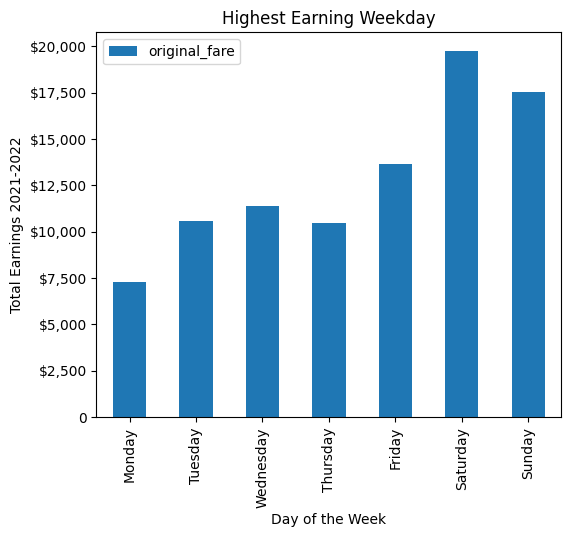

In [ ]:
highest_earning_weekday.plot(kind='bar', title='Highest Earning Weekday',
                             ylabel='Total Earnings 2021-2022',
                             xlabel='Day of the Week', figsize=(6, 5))

plt.xticks([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
           ['Monday', 'Tuesday', 'Wednesday',
            'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.yticks([0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000],
           ['0', '$2,500', '$5,000', '$7,500', '$10,000',
           '$12,500', '$15,000', '$17,500', '$20,000'])

plt.show()

**Which month in 2022 did I complete the most trips?**

In [ ]:
trips_completed = df[df['year'] == 2022.0] #filtering for trips that were completed in 2022
trips_completed = trips_completed.groupby('month').count()
trips_completed = trips_completed.reset_index('month')
trips_completed = trips_completed[['month', 'product_name']] #creates a new dataframe with the month and the count of trips completed
trips_completed = trips_completed.rename({'product_name':'trips_completed'}, axis = 'columns') #renames product name column to trips completed
trips_completed.head()

,month,trips_completed
0,1.0,488
1,2.0,424
2,3.0,635
3,4.0,587
4,5.0,662


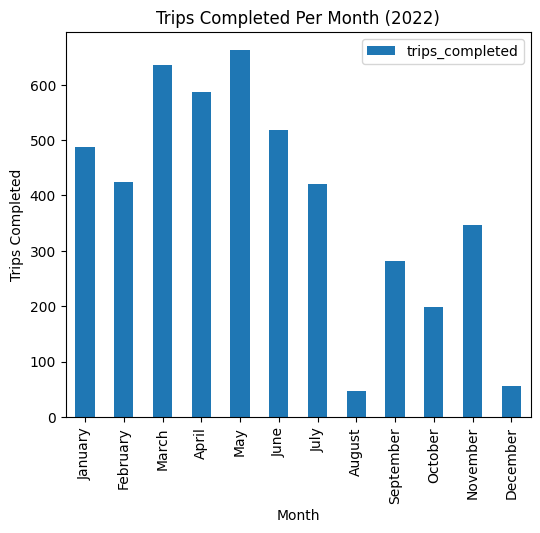

In [ ]:
trips_completed.plot(x='month', y='trips_completed', kind='bar',
                     title='Trips Completed Per Month (2022)',
                     ylabel='Trips Completed',
                     xlabel='Month', figsize=(6, 5))
plt.xticks([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
            7.0, 8.0, 9.0, 10.0, 11.0],
            ['January', 'February', 'March',
             'April', 'May', 'June', 'July',
             'August', 'September', 'October',
             'November', 'December'])

plt.show()

**Which day did I have the highest number of trips completed?**

In [ ]:
df.head()

,product_name,begin_trip_time,dropoff_time,miles_driven,duration_seconds,original_fare,weekday,day_of_month,month,year,hour,day_of_year,time_of_day
0,UberX,2022-12-04T17:29:28.000Z,2022-12-04T17:57:38.000Z,14.64,1690,29.86,6.0,4.0,12.0,2022.0,17.0,338.0,afternoon
1,UberX,2022-12-04T17:02:35.000Z,2022-12-04T17:10:23.000Z,2.49,468,13.82,6.0,4.0,12.0,2022.0,17.0,338.0,afternoon
2,UberX,2022-12-04T15:32:36.000Z,2022-12-04T15:42:05.000Z,4.94,569,12.73,6.0,4.0,12.0,2022.0,15.0,338.0,afternoon
3,UberX,2022-12-04T14:46:16.000Z,2022-12-04T14:53:38.000Z,4.12,442,11.06,6.0,4.0,12.0,2022.0,14.0,338.0,afternoon
4,UberX,2022-12-04T14:21:14.000Z,2022-12-04T14:32:59.000Z,4.52,705,12.59,6.0,4.0,12.0,2022.0,14.0,338.0,afternoon


In [ ]:
busiest_day = df.groupby(['day_of_year']).count().sort_values('month', ascending = False)
busiest_day = busiest_day.reset_index('day_of_year')
busiest_day = busiest_day[['day_of_year', 'month']]
busiest_day = busiest_day.rename({'month':'trips_completed'}, axis = 'columns')
busiest_day.head(1)

,day_of_year,trips_completed
0,324.0,49


324th Day = November 20th, 2022

**What was my longest trip by miles?**

In [ ]:
df.sort_values('miles_driven', ascending = False).head(1)

,product_name,begin_trip_time,dropoff_time,miles_driven,duration_seconds,original_fare,weekday,day_of_month,month,year,hour,day_of_year,time_of_day
2816,UberX,2022-04-19T00:17:40.000Z,2022-04-19T02:48:56.000Z,154.24,9076,175.19,1.0,19.0,4.0,2022.0,0.0,109.0,morning


**How many trips did I average per day?**

In [ ]:
df.groupby('day_of_year').count().mean().round()

product_name        20.0
status              20.0
begin_trip_time     20.0
dropoff_time        20.0
miles_driven        20.0
duration_seconds    20.0
base_fare           20.0
original_fare       20.0
cancellation_fee    20.0
weekday             20.0
day_of_month        20.0
month               20.0
year                20.0
hour                20.0
time_of_day         20.0
dtype: float64

In [ ]:
print('Avg Trips Per Day')
df.groupby('day_of_year')['hour'].count().mean().round()

Avg Trips Per Day


20.0

**Did I earn more money during the day or during the night**

In [ ]:
#Morning and afternoon trips will be considered day
#Evening and midnight trips will be considered night
df.groupby('time_of_day')['original_fare'].sum()

time_of_day
afternoon    26082.11
evening      28187.30
midnight      9078.62
morning      26725.02
Name: original_fare, dtype: float64

**How much did I earn in 2022 and 2021?**

In [ ]:
df.groupby('year')['original_fare'].sum()

year
2021.0     8617.60
2022.0    81455.45
Name: original_fare, dtype: float64

**Which trip was most requested, UberGreen, UberX, or UberPet?**

In [ ]:
df.groupby('product_name').product_name.count()

product_name
Black         55
Green        144
Mid-Tier     105
UberX       4877
Name: product_name, dtype: int64

**What was the highest/least earning month in 2022?**

In [ ]:
df1 = df[df['year'] == 2022]
df1 = df1.groupby('month')[['original_fare']].sum()
df1 = df1.reset_index('month')
#df1 = df1.drop

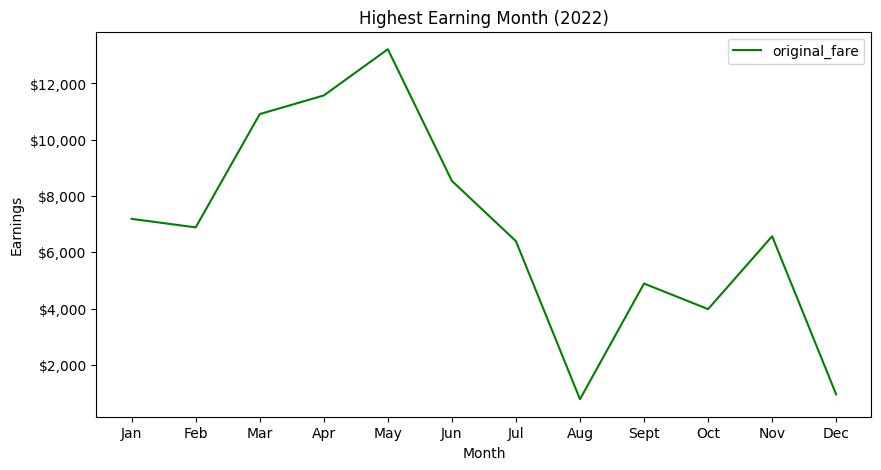

In [ ]:
df1.plot(x='month', y='original_fare', kind='line',
                     title='Highest Earning Month (2022)',
                     ylabel='Earnings',
                     xlabel='Month', figsize=(10, 5),
                     color='green')

plt.xticks([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0],
 ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.yticks([2000, 4000, 6000, 8000, 10000, 12000],
 ['$2,000', '$4,000', '$6,000', '$8,000', '$10,000', '$12,000'])

plt.show()

**What was my highest earning trip?**

In [ ]:
df.original_fare.sort_values(ascending = False).head(1)

2816    175.19
Name: original_fare, dtype: float64

In [ ]:
df.head()

,product_name,status,begin_trip_time,dropoff_time,miles_driven,duration_seconds,base_fare,original_fare,cancellation_fee,weekday,day_of_month,month,year,hour,day_of_year,time_of_day
0,UberX,completed,2022-12-04T17:29:28.000Z,2022-12-04T17:57:38.000Z,14.64,1690,2.89,29.86,0.0,6.0,4.0,12.0,2022.0,17.0,338.0,afternoon
1,UberX,completed,2022-12-04T17:02:35.000Z,2022-12-04T17:10:23.000Z,2.49,468,2.89,13.82,0.0,6.0,4.0,12.0,2022.0,17.0,338.0,afternoon
2,UberX,completed,2022-12-04T15:32:36.000Z,2022-12-04T15:42:05.000Z,4.94,569,2.89,12.73,0.0,6.0,4.0,12.0,2022.0,15.0,338.0,afternoon
3,UberX,completed,2022-12-04T14:46:16.000Z,2022-12-04T14:53:38.000Z,4.12,442,2.89,11.06,0.0,6.0,4.0,12.0,2022.0,14.0,338.0,afternoon
4,UberX,completed,2022-12-04T14:21:14.000Z,2022-12-04T14:32:59.000Z,4.52,705,2.89,12.59,0.0,6.0,4.0,12.0,2022.0,14.0,338.0,afternoon


**Build a Predictive Model**

In [ ]:
df2 = (df[df['status'] == 'completed']) #only show completed trips

In [ ]:
df2 = df.drop(['base_fare', 'cancellation_fee', 'status'], axis = 'columns') #i dont need cancellation fee or base fare so im dropping them

In [ ]:
df2.head()

,product_name,begin_trip_time,dropoff_time,miles_driven,duration_seconds,original_fare,weekday,day_of_month,month,year,hour,day_of_year,time_of_day
0,UberX,2022-12-04T17:29:28.000Z,2022-12-04T17:57:38.000Z,14.64,1690,29.86,6.0,4.0,12.0,2022.0,17.0,338.0,afternoon
1,UberX,2022-12-04T17:02:35.000Z,2022-12-04T17:10:23.000Z,2.49,468,13.82,6.0,4.0,12.0,2022.0,17.0,338.0,afternoon
2,UberX,2022-12-04T15:32:36.000Z,2022-12-04T15:42:05.000Z,4.94,569,12.73,6.0,4.0,12.0,2022.0,15.0,338.0,afternoon
3,UberX,2022-12-04T14:46:16.000Z,2022-12-04T14:53:38.000Z,4.12,442,11.06,6.0,4.0,12.0,2022.0,14.0,338.0,afternoon
4,UberX,2022-12-04T14:21:14.000Z,2022-12-04T14:32:59.000Z,4.52,705,12.59,6.0,4.0,12.0,2022.0,14.0,338.0,afternoon


In [ ]:
df3 = (df2[df2['year'] == 2022.0]) #i only want to show trips from 2022 for my predictive model since there is so few in 2021

In [ ]:
df3.head()

,product_name,begin_trip_time,dropoff_time,miles_driven,duration_seconds,original_fare,weekday,day_of_month,month,year,hour,day_of_year,time_of_day
0,UberX,2022-12-04T17:29:28.000Z,2022-12-04T17:57:38.000Z,14.64,1690,29.86,6.0,4.0,12.0,2022.0,17.0,338.0,afternoon
1,UberX,2022-12-04T17:02:35.000Z,2022-12-04T17:10:23.000Z,2.49,468,13.82,6.0,4.0,12.0,2022.0,17.0,338.0,afternoon
2,UberX,2022-12-04T15:32:36.000Z,2022-12-04T15:42:05.000Z,4.94,569,12.73,6.0,4.0,12.0,2022.0,15.0,338.0,afternoon
3,UberX,2022-12-04T14:46:16.000Z,2022-12-04T14:53:38.000Z,4.12,442,11.06,6.0,4.0,12.0,2022.0,14.0,338.0,afternoon
4,UberX,2022-12-04T14:21:14.000Z,2022-12-04T14:32:59.000Z,4.52,705,12.59,6.0,4.0,12.0,2022.0,14.0,338.0,afternoon


In [ ]:
df4 = df3.drop(['begin_trip_time', 'dropoff_time'], axis = 'columns')

In [ ]:
df4.head()

,product_name,miles_driven,duration_seconds,original_fare,weekday,day_of_month,month,year,hour,day_of_year,time_of_day
0,UberX,14.64,1690,29.86,6.0,4.0,12.0,2022.0,17.0,338.0,afternoon
1,UberX,2.49,468,13.82,6.0,4.0,12.0,2022.0,17.0,338.0,afternoon
2,UberX,4.94,569,12.73,6.0,4.0,12.0,2022.0,15.0,338.0,afternoon
3,UberX,4.12,442,11.06,6.0,4.0,12.0,2022.0,14.0,338.0,afternoon
4,UberX,4.52,705,12.59,6.0,4.0,12.0,2022.0,14.0,338.0,afternoon


In [ ]:
#Turning my text data into numeric values
dummies_product_name = pd.get_dummies(df4.product_name)
dummies_time_of_day = pd.get_dummies(df4.time_of_day)
df5 = pd.concat([df4, dummies_product_name, dummies_time_of_day], axis = 'columns')
df5.head()

,product_name,miles_driven,duration_seconds,original_fare,weekday,day_of_month,month,year,hour,day_of_year,time_of_day,Black,Green,Mid-Tier,UberX,afternoon,evening,midnight,morning
0,UberX,14.64,1690,29.86,6.0,4.0,12.0,2022.0,17.0,338.0,afternoon,0,0,0,1,1,0,0,0
1,UberX,2.49,468,13.82,6.0,4.0,12.0,2022.0,17.0,338.0,afternoon,0,0,0,1,1,0,0,0
2,UberX,4.94,569,12.73,6.0,4.0,12.0,2022.0,15.0,338.0,afternoon,0,0,0,1,1,0,0,0
3,UberX,4.12,442,11.06,6.0,4.0,12.0,2022.0,14.0,338.0,afternoon,0,0,0,1,1,0,0,0
4,UberX,4.52,705,12.59,6.0,4.0,12.0,2022.0,14.0,338.0,afternoon,0,0,0,1,1,0,0,0


In [ ]:
# Seperating my X and y values
X = df5.drop(['product_name', 'time_of_day', 'original_fare'], axis = 'columns') #isolating my X value, this is what I want to predict

In [ ]:
y = df5[['original_fare']] #the y value is what we want to predict

In [ ]:
model_params = {
    'Lasso' : {
        'model' : Lasso(),
        'params' :{
            'fit_intercept' : [True, False],
            'copy_X' : [True, False],
        }
    },
    'Ridge' : {
        'model' : Ridge(),
        'params' : {
           'fit_intercept' : [True, False],
            'copy_X' : [True, False],
        }
    },
    'Linear Regression' : {
        'model' : LinearRegression(),
        'params' : {
            'positive' : [True, False],
            'fit_intercept' : [True, False],
        }
    }
}

scores = []

for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
  clf.fit(X, y)
  scores.append({
      'model' : model_name,
      'best_score' : clf.best_score_,
      'best_params' : clf.best_params_
  })

best_model = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params']) #gives best score/params for each model
best_model

,model,best_score,best_params
0,Lasso,0.705276,"{'copy_X': True, 'fit_intercept': True}"
1,Ridge,0.756103,"{'copy_X': True, 'fit_intercept': False}"
2,Linear Regression,0.758900,"{'fit_intercept': False, 'positive': True}"


**Sources**

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html
# https://stackoverflow.com/questions/37818279/typeerror-unsupported-operand-types-for-float-and-numpy-float64
# https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html